In [71]:
import pandas as pd

df_tweets = pd.read_csv("dataset.csv")


CZĘŚĆ 1 - PRZETWARZANIE I CZYSZCZENIE DANYCH

In [72]:
# zad 1

df_tweets = df_tweets.replace ({'created_at' : { 'Mon' : "Poniedziałek", 'Tue' : "Wtorek", 'Wed' : "Środa" , 'Thu' : "Czwartek", 'Fri' : "Piątek",
                                    'Sat' : "Sobota", 'Sun' : "Niedziela"}}, regex=True)

In [73]:
# zad 2

df_tweets = df_tweets.replace ({'user_created_at' : { 'Jan' : "01", 'Feb' : "02", 'Mar' : "03" , 'Apr' : "04", 'May' : "05",
                                    'Jun' : "06", 'Jul' : "01", 'Aug' : "08", 'Sep' : "09", 'Oct' : "10", 
                                    'Nov' : "11", 'Dec' : "12"}}, regex=True)

In [74]:
# zad 3

links_list = df_tweets['tweet_url'].tolist()

In [75]:
# zad 4

links_in_tweets = df_tweets['urls'].dropna().tolist()

In [76]:
# zad 5

links_to_pics = df_tweets['media'].dropna().tolist()

In [77]:

!pip3 install spacy -U
!python3 -m spacy download pl_core_news_sm


     |████████████████████████████████| 58.6 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


In [78]:
import spacy
nlp = spacy.load("pl_core_news_sm")

In [79]:
# zad 6 

def remove_stopwords(tekst):
  doc = nlp(tekst)
  result = ""
  for token in doc:
    if token.is_stop == False:
      result += token.text + " "
  return result
      

df_tweets["text_without_stopwords"] = df_tweets["text"].apply(remove_stopwords)

# df_tweets["text_without_stopwords"]


CZĘŚĆ 2 - EKSPLORACYJNA ANALIZA DANYCH

In [80]:
# zad 1

df_tweets.nlargest(5, 'favorite_count')

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
24,NaN,Piątek Jan 14 09:48:38 +0000 2022,NaN,NaN,NaN,198,1481926222003200000,zmacu_,1.481926e+18,9.227555e+08,pl,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@zmacu_ Kastrati i polska inflacja to dwie naj...,https://twitter.com/D_Smyk/status/148192622200...,Sun 08 21 22:39:45 +0000 2011,D_Smyk,False,"@WeszloCom, Poznań.",19384,30283,1574,75,"Opalenica, Poznań",Damian Smyk,D_Smyk,39874,NaN,http://www.weszlo.com,False,@zmacu _ Kastrati polska inflacja najszybsze r...
35,NaN,Środa Jan 12 10:55:08 +0000 2022,NaN,NaN,https://twitter.com/alintilayalim/status/14812...,9,1481218179074560000,NaN,NaN,NaN,tr,NaN,True,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...","""5 aylık hamileyim hiç kilo almadım doktor han...",https://twitter.com/kendiniyeme1/status/148121...,Thu 12 17 10:11:24 +0000 2020,kendiniyeme1,False,👼,4616,594,322,0,NaN,Jr. z,kendiniyeme1,244,NaN,NaN,False,""" 5 aylık hamileyim hiç kilo almadım doktor ha..."
49,NaN,Wtorek Jan 11 03:55:08 +0000 2022,NaN,NaN,https://twitter.com/i/web/status/1480750093854...,6,1480750093854720000,dbadji14,1.480639e+18,2.256626e+09,en,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@dbadji14 @fccincinnati So many fantastic opti...,https://twitter.com/CinciMowbray/status/148075...,Mon 09 23 20:28:26 +0000 2013,CinciMowbray,False,NaN,12358,1190,4985,88,NaN,Ian Smith,CinciMowbray,11398,NaN,NaN,False,@dbadji14 @fccincinnati So many fantastic opti...
12,NaN,Sobota Jan 15 18:55:11 +0000 2022,NaN,NaN,https://twitter.com/i/web/status/1482426152476...,4,1482426152476160000,TOPTVPINFO,1.482425e+18,1.080403e+18,pl,NaN,False,3,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@PanoramaTvp2 .@PanoramaTvp2 | Obniżone o 1/4 ...,https://twitter.com/TOPTVPINFO/status/14824261...,Wed 01 02 09:57:45 +0000 2019,TOPTVPINFO,False,Najlepsze materiały wideo prosto z anteny TVP ...,2231,21009,548,73,"Warszawa, Polska",TOP TVP INFO,TOPTVPINFO,45544,NaN,http://www.tvp.info,False,@PanoramaTvp2 .@PanoramaTvp2 | Obniżone 1/4 ce...
23,NaN,Piątek Jan 14 11:42:06 +0000 2022,NaN,NaN,https://twitter.com/i/web/status/1481954774727...,4,1481954774727680000,NaN,NaN,NaN,pl,NaN,False,2,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Niezmiennie od czerwca 2021 roku ośrodek YouGo...,https://twitter.com/Karol_Schubert/status/1481...,Thu 12 07 20:52:01 +0000 2017,Karol_Schubert,False,"Europejczyk ze Śląska, demokrata. 🌍\nProwadzę ...",20357,333,537,2,Poznań/Bytom,Karol Schubert 🇪🇺,Karol_Schubert,3655,NaN,NaN,False,Niezmiennie czerwca 2021 ośrodek YouGov odnoto...


In [81]:
# zad 2

df_tweets.nlargest(5, 'retweet_count')

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
5,NaN,Niedziela Jan 16 22:59:21 +0000 2022,NaN,NaN,NaN,0,1482849988623360000,NaN,NaN,NaN,en,NaN,NaN,43707,1.482275e+18,METAFLOKISHIBA,"<a href=""http://twitter.com/download/android"" ...",RT @METAFLOKISHIBA: 🌟🌟 $FLOKI WILL MAKE YOU CR...,https://twitter.com/AdebiyiAbdulahi/status/148...,Wed 06 17 00:28:55 +0000 2020,AdebiyiAbdulahi,False,NaN,66,10,117,1,NaN,Legend derby💪💪💪,AdebiyiAbdulahi,95,NaN,NaN,False,RT @METAFLOKISHIBA : 🌟 🌟 $ FLOKI WILL MAKE YOU...
27,NaN,Piątek Jan 14 06:17:54 +0000 2022,NaN,NaN,NaN,0,1481873185968640000,NaN,NaN,NaN,es,NaN,NaN,8265,1.481754e+18,Leo_car5,"<a href=""http://twitter.com/download/iphone"" r...","RT @Leo_car5: si t quiere ni se va, ni te deja ir",https://twitter.com/apotorres12/status/1481873...,Wed 01 13 14:40:14 +0000 2016,apotorres12,False,🇦🇹,22340,292,255,0,union de santa fe,Apo :(:,apotorres12,28991,NaN,NaN,False,"RT @Leo_car5 : si t quiere ni se va , ni deja ir"
26,NaN,Piątek Jan 14 06:04:32 +0000 2022,NaN,https://twitter.com/cryb0i/status/148135748340...,NaN,0,1481869822963200000,NaN,NaN,NaN,en,NaN,False,4945,1.481357e+18,cryb0i,"<a href=""http://twitter.com/download/android"" ...",RT @cryb0i: i love this dude https://t.co/XCq6...,https://twitter.com/IllegalDustbin/status/1481...,Wed 10 07 18:35:45 +0000 2009,IllegalDustbin,False,"Full-time Trashcan, Part-time Slug.\nI love ar...",58994,179,2499,10,"Wales, United Kingdom",Dustbin |TRASH| |VTUBER|,IllegalDustbin,42327,NaN,http://www.twitch.tv/dustebin,False,RT @cryb0i : love this dude https://t.co/XCq6B...
37,NaN,Środa Jan 12 09:30:54 +0000 2022,NaN,NaN,https://twitter.com/misscryptoning/status/1481...,0,1481196982110720000,NaN,NaN,NaN,en,NaN,False,1434,1.481118e+18,misscryptoning,"<a href=""http://twitter.com/download/android"" ...",RT @misscryptoning: $50 | 2 hours 🌴 \n\n🔸️ Ret...,https://twitter.com/FBack4F/status/14811969821...,Mon 02 25 15:37:58 +0000 2019,FBack4F,False,🍀🍀🍀🍀☆ #SafeMoon #CluCoin 🚀🚀■ Following back ! ...,3827,138,4814,3,NaN,~San,FBack4F,20721,NaN,NaN,False,RT @misscryptoning : $ 50 | 2 hours 🌴 \n\n 🔸 ️...
11,NaN,Sobota Jan 15 22:47:10 +0000 2022,NaN,NaN,NaN,0,1482484533975040000,NaN,NaN,NaN,und,NaN,NaN,682,1.481931e+18,igorbigga,"<a href=""http://twitter.com/download/android"" ...",RT @igorbigga: Ako Australija može da protera ...,https://twitter.com/JavorkaJavorkic/status/148...,Sun 01 05 20:45:27 +0000 2020,JavorkaJavorkic,False,NaN,86489,472,523,0,NaN,Božica,JavorkaJavorkic,23585,NaN,NaN,False,RT @igorbigga : Ako Australija može da protera...


In [82]:
import numpy as np

In [83]:
# zad 3

idx = np.where((df_tweets['possibly_sensitive'] != True) )
df_tweets.loc[idx]


,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
0,NaN,Poniedziałek Jan 17 13:52:37 +0000 2022,NaN,NaN,NaN,0,1483074782648320000,NaN,NaN,NaN,es,NaN,NaN,175,1.482359e+18,populares,"<a href=""http://twitter.com/download/iphone"" r...",RT @populares: Nuestro recuerdo y cariño a la ...,https://twitter.com/villajosrodrigu/status/148...,Mon 11 04 09:19:16 +0000 2013,villajosrodrigu,False,Presidenta y Portavoz de @PopularsPaterna . Fo...,76916,10754,9444,40,Paterna-C.Valenciana(España),María Villajos,villajosrodrigu,64769,NaN,NaN,False,RT @populares : Nuestro recuerdo y cariño la f...
1,NaN,Poniedziałek Jan 17 09:00:48 +0000 2022,Jedziemy wieszwięcej,NaN,NaN,0,1483001348098560000,NaN,NaN,NaN,pl,NaN,NaN,87,1.482981e+18,tvp_info,"<a href=""http://twitter.com/download/android"" ...",RT @tvp_info: #Jedziemy. Polska ma instrumenty...,https://twitter.com/waldema10899274/status/148...,Thu 02 08 19:09:37 +0000 2018,waldema10899274,False,Lewactwo - przyczyna zła wszelkiego .,194329,2201,2020,0,Polska,waldemar Łaziński. 🇵🇱🇵🇱🇵🇱🕊,waldema10899274,48701,NaN,NaN,False,RT @tvp_info : # Jedziemy . Polska instrumenty...
2,NaN,Poniedziałek Jan 17 07:55:07 +0000 2022,NaN,NaN,NaN,0,1482984815767040000,rzeczpospolita,1.482979e+18,1.943990e+08,pl,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@rzeczpospolita Sprawca Luca L. Pewnie polski ...,https://twitter.com/AptekaC/status/14829848157...,Fri 01 31 23:06:13 +0000 2020,AptekaC,False,Farmaceuta. Życie jak gówno na kole raz na gó...,3099,374,172,6,PL,Marco,AptekaC,11184,NaN,NaN,False,@rzeczpospolita Sprawca Luca L . Pewnie polski...
3,NaN,Poniedziałek Jan 17 04:24:46 +0000 2022,NaN,NaN,NaN,0,1482931881771520000,NaN,NaN,NaN,pl,NaN,NaN,33,1.482726e+18,wPolityce_pl,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @wPolityce_pl: TYLKO U NAS. Porażka @bbudka...,https://twitter.com/boguslawa21/status/1482931...,Sun 06 14 11:07:41 +0000 2015,boguslawa21,False,Polska jest najwazniejsza.Zlo Dobrem Zwyciezaj...,386290,2027,1844,4,NaN,Boguslawa #BabiesLivesMatter,boguslawa21,288816,NaN,NaN,False,RT @wPolityce_pl : . Porażka @bbudka Jaworznie...
4,NaN,Poniedziałek Jan 17 02:08:23 +0000 2022,NaN,NaN,NaN,0,1482897556833280000,NaN,NaN,NaN,pl,NaN,NaN,290,1.482817e+18,gambitek,"<a href=""http://twitter.com/download/iphone"" r...",RT @gambitek: To mówicie że zły Tusk chciał ab...,https://twitter.com/ArtiSzelagowski/status/148...,Fri 12 02 09:54:49 +0000 2011,ArtiSzelagowski,False,Nie stoję bezczynnie w obecności zła.,85760,294,454,12,Poland,Ragnarök,ArtiSzelagowski,30776,NaN,NaN,False,RT @gambitek : mówicie zły Tusk chciał ludzie ...
5,NaN,Niedziela Jan 16 22:59:21 +0000 2022,NaN,NaN,NaN,0,1482849988623360000,NaN,NaN,NaN,en,NaN,NaN,43707,1.482275e+18,METAFLOKISHIBA,"<a href=""http://twitter.com/download/android"" ...",RT @METAFLOKISHIBA: 🌟🌟 $FLOKI WILL MAKE YOU CR...,https://twitter.com/AdebiyiAbdulahi/status/148...,Wed 06 17 00:28:55 +0000 2020,AdebiyiAbdulahi,False,NaN,66,10,117,1,NaN,Legend derby💪💪💪,AdebiyiAbdulahi,95,NaN,NaN,False,RT @METAFLOKISHIBA : 🌟 🌟 $ FLOKI WILL MAKE YOU...
6,NaN,Niedziela Jan 16 16:28:50 +0000 2022,NaN,NaN,NaN,0,1482751709155840000,NaN,NaN,NaN,pl,NaN,NaN,271,1.482716e+18,synxchaosu,"<a href=""http://twitter.com/download/android"" ...",RT @synxchaosu: W Polsce w niespełna rok w zwi...,https://twitter.com/Bruno34525210/status/14827...,Sat 10 20 21:27:25 +0000 2018,Bruno34525210,False,Uwielbiam zapach płonącej tęczy o poranku. Zer...,3885,187,567,0,Warszawa Wola,Bruno,Bruno34525210,3153,NaN,NaN,False,RT @synxchaosu : 

In [84]:
# zad 4

df_tweets.loc[df_tweets['user_created_at'] == df_tweets['user_created_at'].max()]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
18,NaN,Sobota Jan 15 08:55:49 +0000 2022,NaN,NaN,https://twitter.com/i/web/status/1482275314818...,1,1482275314818560000,jacek_liberski,1.482172e+18,254521569.0,pl,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@jacek_liberski @PL_2050 @__Lewica @nowePSL @K...,https://twitter.com/M_K_Ciepierski/status/1482...,Wed 12 18 13:13:55 +0000 2019,M_K_Ciepierski,False,"Muzyk, anty-PiS. 🇵🇱🇪🇺\nJuż tu byłem. Jedno kon...",10406,1459,2235,18,"Bytom, śląskie",Marek Krzysztof 🇵🇱🇪🇺,M_K_Ciepierski,22351,NaN,NaN,False,@jacek_liberski @PL_2050 @__Lewica @nowePSL @K...


In [85]:
# zad 5

df_tweets.loc[df_tweets['user_followers_count'] == df_tweets['user_followers_count'].max()]


,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
43,NaN,Wtorek Jan 11 12:30:24 +0000 2022,NaN,NaN,NaN,0,1480879765368320000,NaN,NaN,NaN,pl,NaN,NaN,44,1.480879e+18,A_Marchewka,"<a href=""https://mobile.twitter.com"" rel=""nofo...","RT @A_Marchewka: Szalejąca drożyzna, wyższe ra...",https://twitter.com/Platforma_org/status/14808...,Thu 01 02 07:46:15 +0000 2009,Platforma_org,False,Oficjalne konto Platformy Obywatelskiej✌️ #Koa...,23323,188137,885,580,Polska,PlatformaObywatelska,Platforma_org,104634,NaN,http://www.platforma.org,True,"RT @A_Marchewka : Szalejąca drożyzna , wyższe ..."


In [86]:
# zad 6

idx = np.where((df_tweets['user_verified'] == True) )
df_tweets.loc[idx]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
43,NaN,Wtorek Jan 11 12:30:24 +0000 2022,NaN,NaN,NaN,0,1480879765368320000,NaN,NaN,NaN,pl,NaN,NaN,44,1.480879e+18,A_Marchewka,"<a href=""https://mobile.twitter.com"" rel=""nofo...","RT @A_Marchewka: Szalejąca drożyzna, wyższe ra...",https://twitter.com/Platforma_org/status/14808...,Thu 01 02 07:46:15 +0000 2009,Platforma_org,False,Oficjalne konto Platformy Obywatelskiej✌️ #Koa...,23323,188137,885,580,Polska,PlatformaObywatelska,Platforma_org,104634,NaN,http://www.platforma.org,True,"RT @A_Marchewka : Szalejąca drożyzna , wyższe ..."


In [87]:
# zad 7

df_copy = pd.DataFrame()

df_copy['created_at_day'] = df_tweets['created_at'].str.split(" ").str[0]

print("Dzień tygodnia kiedy tweety były najczęściej publikowane:", df_copy['created_at_day'].value_counts().idxmax())


Dzień tygodnia kiedy tweety były najczęściej publikowane: Wtorek


CZĘŚĆ 3 - PRZETWARZANIE JĘZYKA NATURALNEGO

In [88]:
# zad 1

def find_person(tekst):
  doc = nlp(tekst)
  result = ""
  for ent in doc.ents:
    if ent.label_ == "persName":
      result += ent.text + " "
  return result

df_tweets["persons"] = df_tweets["text"].apply(find_person)

# df_tweets["persons"]



In [89]:
# zad 2

def find_place(tekst):
  doc = nlp(tekst)
  result = ""
  for ent in doc.ents:
    if ent.label_ == "placeName":
      result += ent.text + " "
  return result

df_tweets["places"] = df_tweets["text"].apply(find_place)

# df_tweets["places"]

In [90]:
# zad 3

def find_org(tekst):
  doc = nlp(tekst)
  result = ""
  for ent in doc.ents:
    if ent.label_ == "orgName":
      result += ent.text + " "
  return result

df_tweets["organizations"] = df_tweets["text"].apply(find_org)

# df_tweets["organizations"]

In [91]:
# zad 4

nlp_blank = spacy.blank("pl")
ruler = nlp_blank.add_pipe("entity_ruler")

pattern = "\S+"
patterns = [{"label": "HASHTAG", "pattern": [{"ORTH": "#"}, {"TEXT": {"REGEX": pattern}}]}]

ruler.add_patterns(patterns)

def find_hashtag(tekst):
  doc = nlp_blank(tekst)
  result = ""
  for ent in doc.ents:
    if ent.label_ == "HASHTAG":
      result += ent.text + " "
  return result

df_tweets["hashtags"] = df_tweets["text"].apply(find_hashtag)

df_tweets

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,persons,places,organizations
0,NaN,Poniedziałek Jan 17 13:52:37 +0000 2022,,NaN,NaN,0,1483074782648320000,NaN,NaN,NaN,es,NaN,NaN,175,1.482359e+18,populares,"<a href=""http://twitter.com/download/iphone"" r...",RT @populares: Nuestro recuerdo y cariño a la ...,https://twitter.com/villajosrodrigu/status/148...,Mon 11 04 09:19:16 +0000 2013,villajosrodrigu,False,Presidenta y Portavoz de @PopularsPaterna . Fo...,76916,10754,9444,40,Paterna-C.Valenciana(España),María Villajos,villajosrodrigu,64769,NaN,NaN,False,RT @populares : Nuestro recuerdo y cariño la f...,Manuel Fraga,,
1,NaN,Poniedziałek Jan 17 09:00:48 +0000 2022,#Jedziemy #wieszwięcej,NaN,NaN,0,1483001348098560000,NaN,NaN,NaN,pl,NaN,NaN,87,1.482981e+18,tvp_info,"<a href=""http://twitter.com/download/android"" ...",RT @tvp_info: #Jedziemy. Polska ma instrumenty...,https://twitter.com/waldema10899274/status/148...,Thu 02 08 19:09:37 +0000 2018,waldema10899274,False,Lewactwo - przyczyna zła wszelkiego .,194329,2201,2020,0,Polska,waldemar Łaziński. 🇵🇱🇵🇱🇵🇱🕊,waldema10899274,48701,NaN,NaN,False,RT @tvp_info : # Jedziemy . Polska instrumenty...,,Polska,Fit for
2,NaN,Poniedziałek Jan 17 07:55:07 +0000 2022,,NaN,NaN,0,1482984815767040000,rzeczpospolita,1.482979e+18,1.943990e+08,pl,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@rzeczpospolita Sprawca Luca L. Pewnie polski ...,https://twitter.com/AptekaC/status/14829848157...,Fri 01 31 23:06:13 +0000 2020,AptekaC,False,Farmaceuta. Życie jak gówno na kole raz na gó...,3099,374,172,6,PL,Marco,AptekaC,11184,NaN,NaN,False,@rzeczpospolita Sprawca Luca L . Pewnie polski...,Lakatosz Kwiek,polski Polska,@rzeczpospolita Sprawca Luca L.
3,NaN,Poniedziałek Jan 17 04:24:46 +0000 2022,,NaN,NaN,0,1482931881771520000,NaN,NaN,NaN,pl,NaN,NaN,33,1.482726e+18,wPolityce_pl,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @wPolityce_pl: TYLKO U NAS. Porażka @bbudka...,https://twitter.com/boguslawa21/status/1482931...,Sun 06 14 11:07:41 +0000 2015,boguslawa21,False,Polska jest najwazniejsza.Zlo Dobrem Zwyciezaj...,386290,2027,1844,4,NaN,Boguslawa #BabiesLivesMatter,boguslawa21,288816,NaN,NaN,False,RT @wPolityce_pl : . Porażka @bbudka Jaworznie...,,Jaworznie polską,
4,NaN,Poniedziałek Jan 17 02:08:23 +0000 2022,,NaN,NaN,0,1482897556833280000,NaN,NaN,NaN,pl,NaN,NaN,290,1.482817e+18,gambitek,"<a href=""http://twitter.com/download/iphone"" r...",RT @gambitek: To mówicie że zły Tusk chciał ab...,https://twitter.com/ArtiSzelagowski/status/148...,Fri 12 02 09:54:49 +0000 2011,ArtiSzelagowski,False,Nie stoję bezczynnie w obecności zła.,85760,294,454,12,Poland,Ragnarök,ArtiSzelagowski,30776,NaN,NaN,False,RT @gambitek : mówicie zły Tusk chciał ludzie ...,Tusk,,PiS…
5,NaN,Niedziela Jan 16 22:59:21 +0000 2022,,NaN,NaN,0,1482849988623360000,NaN,NaN,NaN,en,NaN,NaN,43707,1.482275e+18,METAFLOKISHIBA,"<a href=""http://twitter.com/download/android"" ...",RT @METAFLOKISHIBA: 🌟🌟 $FLOKI WILL MAKE YOU CR...,https://twitter.com/AdebiyiAbdulahi/status/148...,Wed 06 17 00:28:55 +0000 2020,AdebiyiAbdulahi,False,NaN,66,10,117,1,NaN,Legend derby💪💪💪,AdebiyiAbdulahi,95,NaN,NaN,False,RT @METAFLOKISHIBA : 🌟 🌟 $ FLOKI WILL MAKE YOU...,,,THE PRICE IS SKYROCKETING AND ABOUT
6,NaN,Niedziela Jan 16 16:28:50 +0000 2022,,NaN,NaN,0,1482751709155840000,NaN,NaN,NaN,pl,NaN,NaN,271,1.482716e+18,synxchaosu,"<a href=""http://twitter.com/download/android"" ...",RT @synxchaosu: W Polsce w niespełna rok w zwi...,https://twitter.com/Bruno34525210/status/14827...,Sat 10 20 21

CZĘŚĆ 4 - ROZWIĄZYWANIE PROBLEMÓW/UMIEJĘTNOŚĆ INTERPRETOWANIA DOKUMENTACJI

In [92]:
import matplotlib.pyplot as plt

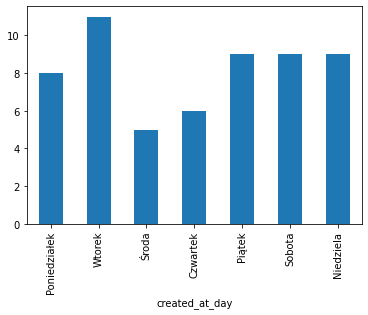

In [93]:
# zad 1

days = ["Poniedziałek", "Wtorek", "Środa", "Czwartek", "Piątek", "Sobota", "Niedziela"]

df_copy = df_copy.groupby(['created_at_day']).size().reindex(days)

df_copy.plot(x=df_copy[0], y=df_copy[1], kind="bar")

In [94]:
df_tweets

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,persons,places,organizations
0,NaN,Poniedziałek Jan 17 13:52:37 +0000 2022,,NaN,NaN,0,1483074782648320000,NaN,NaN,NaN,es,NaN,NaN,175,1.482359e+18,populares,"<a href=""http://twitter.com/download/iphone"" r...",RT @populares: Nuestro recuerdo y cariño a la ...,https://twitter.com/villajosrodrigu/status/148...,Mon 11 04 09:19:16 +0000 2013,villajosrodrigu,False,Presidenta y Portavoz de @PopularsPaterna . Fo...,76916,10754,9444,40,Paterna-C.Valenciana(España),María Villajos,villajosrodrigu,64769,NaN,NaN,False,RT @populares : Nuestro recuerdo y cariño la f...,Manuel Fraga,,
1,NaN,Poniedziałek Jan 17 09:00:48 +0000 2022,#Jedziemy #wieszwięcej,NaN,NaN,0,1483001348098560000,NaN,NaN,NaN,pl,NaN,NaN,87,1.482981e+18,tvp_info,"<a href=""http://twitter.com/download/android"" ...",RT @tvp_info: #Jedziemy. Polska ma instrumenty...,https://twitter.com/waldema10899274/status/148...,Thu 02 08 19:09:37 +0000 2018,waldema10899274,False,Lewactwo - przyczyna zła wszelkiego .,194329,2201,2020,0,Polska,waldemar Łaziński. 🇵🇱🇵🇱🇵🇱🕊,waldema10899274,48701,NaN,NaN,False,RT @tvp_info : # Jedziemy . Polska instrumenty...,,Polska,Fit for
2,NaN,Poniedziałek Jan 17 07:55:07 +0000 2022,,NaN,NaN,0,1482984815767040000,rzeczpospolita,1.482979e+18,1.943990e+08,pl,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@rzeczpospolita Sprawca Luca L. Pewnie polski ...,https://twitter.com/AptekaC/status/14829848157...,Fri 01 31 23:06:13 +0000 2020,AptekaC,False,Farmaceuta. Życie jak gówno na kole raz na gó...,3099,374,172,6,PL,Marco,AptekaC,11184,NaN,NaN,False,@rzeczpospolita Sprawca Luca L . Pewnie polski...,Lakatosz Kwiek,polski Polska,@rzeczpospolita Sprawca Luca L.
3,NaN,Poniedziałek Jan 17 04:24:46 +0000 2022,,NaN,NaN,0,1482931881771520000,NaN,NaN,NaN,pl,NaN,NaN,33,1.482726e+18,wPolityce_pl,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @wPolityce_pl: TYLKO U NAS. Porażka @bbudka...,https://twitter.com/boguslawa21/status/1482931...,Sun 06 14 11:07:41 +0000 2015,boguslawa21,False,Polska jest najwazniejsza.Zlo Dobrem Zwyciezaj...,386290,2027,1844,4,NaN,Boguslawa #BabiesLivesMatter,boguslawa21,288816,NaN,NaN,False,RT @wPolityce_pl : . Porażka @bbudka Jaworznie...,,Jaworznie polską,
4,NaN,Poniedziałek Jan 17 02:08:23 +0000 2022,,NaN,NaN,0,1482897556833280000,NaN,NaN,NaN,pl,NaN,NaN,290,1.482817e+18,gambitek,"<a href=""http://twitter.com/download/iphone"" r...",RT @gambitek: To mówicie że zły Tusk chciał ab...,https://twitter.com/ArtiSzelagowski/status/148...,Fri 12 02 09:54:49 +0000 2011,ArtiSzelagowski,False,Nie stoję bezczynnie w obecności zła.,85760,294,454,12,Poland,Ragnarök,ArtiSzelagowski,30776,NaN,NaN,False,RT @gambitek : mówicie zły Tusk chciał ludzie ...,Tusk,,PiS…
5,NaN,Niedziela Jan 16 22:59:21 +0000 2022,,NaN,NaN,0,1482849988623360000,NaN,NaN,NaN,en,NaN,NaN,43707,1.482275e+18,METAFLOKISHIBA,"<a href=""http://twitter.com/download/android"" ...",RT @METAFLOKISHIBA: 🌟🌟 $FLOKI WILL MAKE YOU CR...,https://twitter.com/AdebiyiAbdulahi/status/148...,Wed 06 17 00:28:55 +0000 2020,AdebiyiAbdulahi,False,NaN,66,10,117,1,NaN,Legend derby💪💪💪,AdebiyiAbdulahi,95,NaN,NaN,False,RT @METAFLOKISHIBA : 🌟 🌟 $ FLOKI WILL MAKE YOU...,,,THE PRICE IS SKYROCKETING AND ABOUT
6,NaN,Niedziela Jan 16 16:28:50 +0000 2022,,NaN,NaN,0,1482751709155840000,NaN,NaN,NaN,pl,NaN,NaN,271,1.482716e+18,synxchaosu,"<a href=""http://twitter.com/download/android"" ...",RT @synxchaosu: W Polsce w niespełna rok w zwi...,https://twitter.com/Bruno34525210/status/14827...,Sat 10 20 21